In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_score = log_reg.decision_function(X_test)

In [2]:
np.min(decision_score), np.max(decision_score)

(-51.45166638773692, 14.06596241764103)

In [3]:
from sklearn.metrics import  recall_score, precision_score
thresholds = np.arange(np.min(decision_score), np.max(decision_score),0.1)

In [4]:
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_score >= - threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


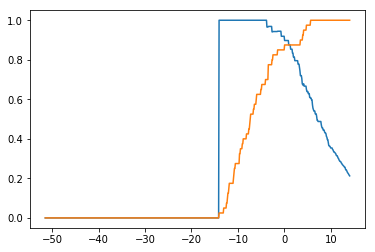

In [5]:
plt.plot(thresholds,precisions)
plt.plot(thresholds, recalls)

### Precision-Recall曲线

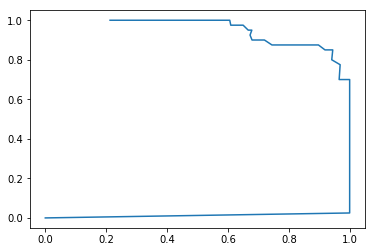

In [6]:
plt.plot(precisions, recalls)

### 在sklear当中可以直接调用

In [7]:
from sklearn.metrics import precision_recall_curve

precisions, recalls,thresholds = precision_recall_curve(y_test, decision_score)

In [8]:
precisions.shape

(67,)

In [9]:
recalls.shape

(67,)

In [10]:
thresholds.shape

(66,)

注意这里是相差1的

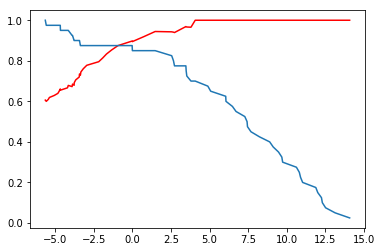

In [11]:
plt.plot(thresholds, precisions[:-1], color='r')
plt.plot(thresholds, recalls[:-1])

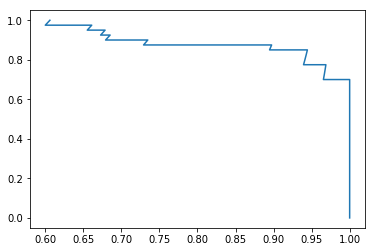

In [12]:
plt.plot(precisions, recalls)

### Precision-Recall曲线

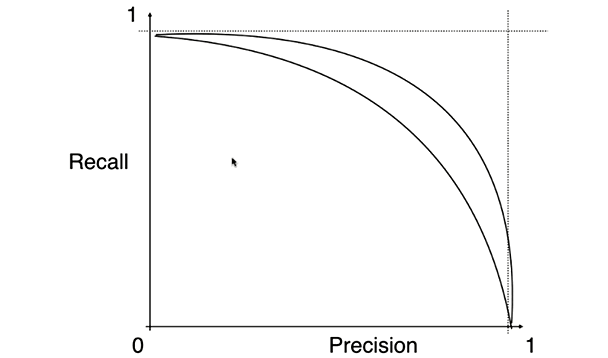
越靠近外面，准确率和召回率越大，模型就越好